Found 43 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.5229 - loss: 2.5042 - val_accuracy: 0.5000 - val_loss: 4.7099
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.4616 - loss: 2.7252 - val_accuracy: 0.5000 - val_loss: 1.5988
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5545 - loss: 1.4813 - val_accuracy: 0.5000 - val_loss: 0.8966
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4610 - loss: 0.8319 - val_accuracy: 1.0000 - val_loss: 0.4004
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8653 - loss: 0.4683 - val_accuracy: 1.0000 - val_loss: 0.2573
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7461 - loss: 0.4363 - val_accuracy: 0.5000 - val_loss: 0.8291
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5698 - loss: 0.6761 - val_accuracy: 1.0000 - val_loss: 0.1973
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216m

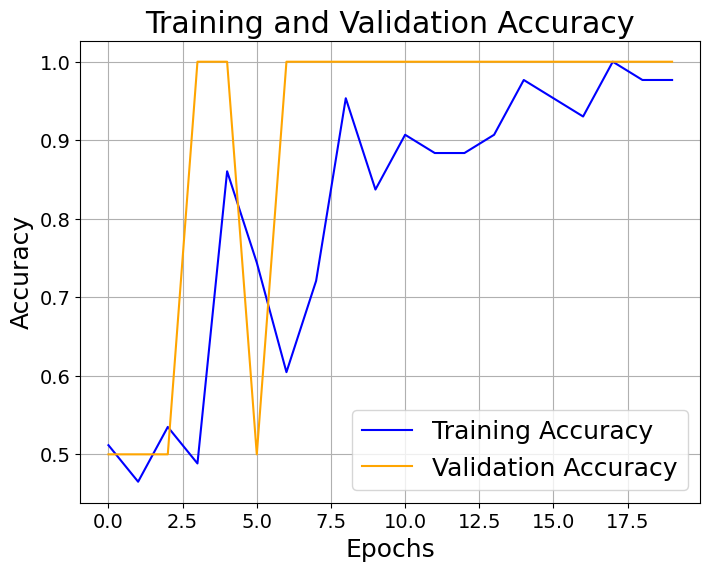

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preparation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory('C:/Users/ahmed/Downloads/project/train', target_size=(64, 64), batch_size=32, subset='training', class_mode='categorical')
val_data = datagen.flow_from_directory('C:/Users/ahmed/Downloads/project/test', target_size=(64, 64), batch_size=32, subset='validation', class_mode='categorical')
# Model definition
model_ann = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
# Compilation
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model_ann.fit(train_data, validation_data=val_data, epochs=20)


# Plot Accuracy Graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input


# Define labels
labels = {0: 'Apple', 1: 'Banana'}

def capture_and_predict():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not access the camera.")
        return

    print("Press 'c' to capture an image and predict, or 'q' to quit.")
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break

        # Display the frame
        cv2.imshow("Camera", frame)

        # Wait for key press
        key = cv2.waitKey(1)
        if key & 0xFF == ord('c'):
            # Process the captured image
            prediction = predict_image(frame)
            print(f"Predicted Type: {prediction}")
        elif key & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

def predict_image(image):
    # Resize the image to match ResNet50 input size
    resized_image = cv2.resize(image, (64, 64))
    # Convert the image to a NumPy array and expand dimensions
    img_array = np.expand_dims(resized_image, axis=0)
    # Preprocess the image for ResNet50
    preprocessed_image = preprocess_input(img_array)

    # Predict using the model
    predictions = model_ann.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map the prediction to the label
    return (predictions)

if __name__ == "__main__":
    capture_and_predict()


Press 'c' to capture an image and predict, or 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Type: [[1.0000000e+00 2.4163905e-22]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Type: [[9.9997914e-01 2.0861051e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Type: [[1.000000e+00 9.225947e-29]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predict